# Time series

A _time series_ is a sequence of data points ordered by time.  Time series data often appear in economics, science and engineering: examples include monthly employment data, the number of influenza cases every year, blood pressure measurements taken at periodic intervals, and noisy measurements of a signal at different points in time.   

A time series consists of data of the form $(x_1, y_1), (x_2, y_2), \ldots, (x_N,y_N)$, where $x_1 < x_2 < \ldots < x_N$ represent instants of time (usually equally spaced) and $y_i$ is the observation at time $x_i$. 

As a running example, we will use a time series consisting of monthly average $CO_2$ concentration levels. In this time series, $x_1,\ldots, x_N$ each represent a month in the period March 1958 ~ May 2019, and $y_i$ the average $CO_2$ concentration in month $x_i$. 

Let us view the data in a scatterplot.

![CO2 Levels](./Data/CO2_levels.png)


_Acknowledgement_ : This array was created from a larger dataset obtained from the National Oceanic 
and Atmospheric Administration (NOAA). This dataset contains historical monthly measurements of the atmospheric concentration of carbon dioxide at Mauna Loa in Hawaii, and is available on this [site](https://www.esrl.noaa.gov/gmd/ccgg/trends/); direct link to the dataset [here](ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt). Thanks also to Prof. Carl Rasmussen, from whose website I learned about this dataset.

Let us load the dataset as a numpy array.

In [1]:
import math
import numpy as np

CO2_data_full =  np.load('Data/CO2_data_full.npy')   #Load the numpy array containing the data
# If you are running on Google Colab, change the path to '/content/drive/MyDrive/IB-Data-Science/Data/CO2_data_full.npy'

CO2_data_full.shape                             #Check the dimensions of the data array

(728, 2)

The numpy array which we have loaded is an $N \times 2$ matrix, with $N=728$. The first column contains the months in which the measurements were taken, and the second column contains the average $CO_2$ concentrations for each month. (The month is represented in terms of a decimal year, and there are a few months for which measurements were not taken.) 

Let us view the first few rows and last few rows of the matrix.

In [3]:
CO2_data_full[1:5, :]

array([[1958.292,  317.45 ],
       [1958.375,  317.5  ],
       [1958.542,  315.86 ],
       [1958.625,  314.93 ]])

In [4]:
CO2_data_full[-5:, :]

array([[2019.042,  410.83 ],
       [2019.125,  411.75 ],
       [2019.208,  411.97 ],
       [2019.292,  413.32 ],
       [2019.375,  414.66 ]])

Let us now view the data in a scatterplot.

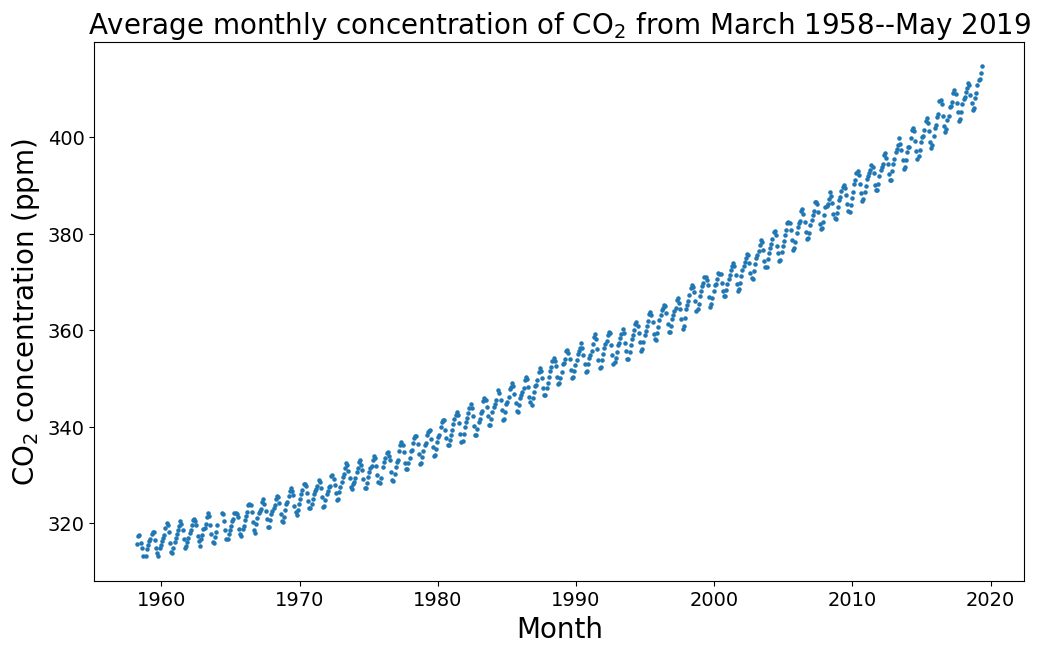

In [2]:
import matplotlib.pyplot as plt

dates = CO2_data_full[:,0]      # First column of array (indexed by 0) contains the dates 
CO2_levels = CO2_data_full[:,1]  # Second column of array (indexed by 1) contains the CO2 levels


# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(dates, CO2_levels, s=5)   # s can be used to adjust the size of the dots
plt.xlabel('Month')
plt.ylabel('CO$_2$ concentration (ppm)')
plt.title('Average monthly concentration of CO$_2$ from March 1958--May 2019')
plt.savefig('CO2_levels.pdf', bbox_inches = 'tight')
plt.show()


We see that CO$_2$ concentration follows a steady upward trend with seasonal (periodic) variations within each year. To see the seasonal variations more clearly, let us view the plot over a 24 month period.

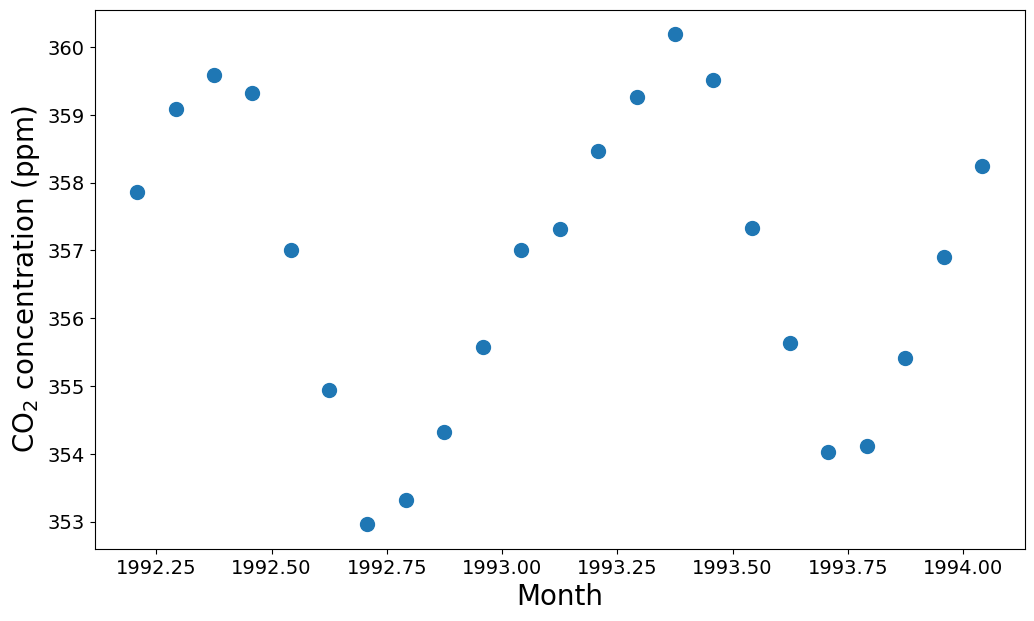

In [3]:
plt.scatter(dates[401:424], CO2_levels[401:424], s=100)
plt.xlabel('Month')
plt.ylabel('CO$_2$ concentration (ppm)')
plt.savefig('CO2_short_interval.pdf', bbox_inches = 'tight')
plt.show()

# Fitting a model to the data

Using the data, we would like to obtain a mathematical model of the form $y = f(x)$ that captures how $CO_2$ concentration varies with time.  Here the function input $x$ is the month, and the output $f(x)$ is the $CO_2$ concentration predicted by the model for month $x$.  

Noting that the time series has a long-term trend and well as seasonal variations, we will use a model of the form 

\begin{align}
f(x) \, = \, f_t (x) \, + \, f_s (x),
\end{align}

where $f_t$ captures the long-term trend and $f_s$ captures the seasonal variation.   In this notebook, we will fit a model to capture the long-term trend of the data set. In the next notebook, we will add the seasonal component to the model as well. 



## Measuring the performance of a model

The goal is to to find a function $f(x)$ that accurately maps any date $x_i$ to its corresponding recorded CO$_2$ value $y_i$. This function $f(x)$ is also called the _model_ and we will use statistical techniques to find it.

The error of the model $(y_i - f(x_i))$ for the sample $(x_i, y_i)$ is called the _residual_ for the sample. Given $N$ data points $(x_1, y_1), \ldots, (x_N, y_N)$ and a model $f$, one measure of how well the model fits the data is the _sum of squared errors_ ($SSE$):
\begin{equation*}
SSE \, = \, \sum_{i=1}^N (y_i - f(x_i))^2. 
\end{equation*}

Another measure is the _mean squared error_ ($MSE$):
\begin{equation*}
MSE \, =  \, \frac{SSE}{N}  \, = \,  \frac{1}{N} \sum_{i=1}^N (y_i - f(x_i))^2.
\end{equation*}


# Fitting the trend 


Let us start with the simplest possible model: $f(x) = c$, where $c$ is a constant.  The optimal choice of $c$ is the one that minimises the sum of squared errors

\begin{equation*}
SSE = \sum_{i=1}^N (y_i - c)^2.
\end{equation*}

Differentiating with respect to $c$ and setting to zero, we see that $SSE$ is minimized when $c = \bar{y} = \frac{1}{n} \sum_{i=1}^N y_i$.  Thus the constant that minimizes the sum of squared errors is the mean of the observed outputs.  

Clearly, unless the data points $y_i$ are nearly constant we don't expect the mean to be a very good model, but it provides an important baseline to start from, and more importantly illustrates the underlying mathematical formulation for finding a good model. The $SSE$ of this "zeroth-order" model is given by
\begin{equation*}
SSE_0 = \sum_{i=1}^N (y_i - \bar{y})^2.
\end{equation*}


#  Linear Regression

Let us now consider a first-order linear model of the form $f(x) = \beta_0 + \beta_1 x$. The SSE is now

\begin{align}
SSE = \sum_{i=1}^N (y_i - \beta_0 - \beta_1 x_i)^2
\end{align}

The values of $\beta_0, \beta_1$ that minimize SSE can be found by taking partial derivatives and setting $\frac{\partial \, SSE}{\partial \beta_0} = \frac{\partial SSE}{\partial \beta_1} =0$. ((Note: Don't forget that we usually have to check what kind of stationary point it is, i.e. is it a local minima or maxima.) 
Instead of using the above expression for SSE directly, we first write it in a form that makes it easy to generalise to higher-order models.  Let

\begin{equation}
\boldsymbol{y} = 
\begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_N
\end{bmatrix}, 
\qquad 
\boldsymbol{X} = 
\begin{bmatrix}
1 & x_1 \\ 
1 & x_2 \\ 
\vdots & \vdots \\ 
1 & x_N
\end{bmatrix}, 
\qquad 
\boldsymbol{\beta} = 
\begin{bmatrix}
\beta_0 \\ 
\beta_1
\end{bmatrix}
\end{equation}

Using this notation, the SSE  can be written as
\begin{equation}
SSE = \| \boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta} \|^2 
= (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta})^{\mathsf{T}} (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta})
\end{equation}
(It is a good linear algebra exercise to check that the above expression for SSE is equivalent to the one in the first equation.)

The optimal value of $\boldsymbol{\beta}$ that minimizes the SSE is 

\begin{equation}
\boldsymbol{\beta}^* \, = \,  (\boldsymbol{X}^{\sf{T}} \boldsymbol{X})^{-1} \boldsymbol{X}^{\sf{T}} \boldsymbol{y}.
\end{equation}

There are two ways to derive this expression for $\boldsymbol{\beta}^*$. One is using linear algebra, and the other is using by using vector calculus. The linear algebra argument is given in Handout 6 of your  notes; we briefly review it below. The following cell describes the vector calculus derivation.

### Linear algebra derivation of $\boldsymbol{\beta}^*$ :    

We would _ideally_ like to make the $SSE = 0$, i.e., we would like to solve 
$\boldsymbol{X}\boldsymbol{\beta} = \boldsymbol{y}$ exactly. But this is not generally possible as we have $N$ equations in only two variables, $\beta_0$ and $\beta_1$.  To find the $\boldsymbol{\beta} = [\beta_0, \beta_1]^{\sf T}$ that minimises the SSE, we note that any vector of the form $\boldsymbol{X}\boldsymbol{\beta}$ lies in the column space of $\boldsymbol{X}$, i.e., $\boldsymbol{X}\boldsymbol{\beta}$ is a linear combination of the columns of $\boldsymbol{X}$ with $\beta_0, \beta_1$ being the coefficients of the combination. 


The reason we cannot solve $\boldsymbol{X}\boldsymbol{\beta} = \boldsymbol{y}$ exactly is because $\boldsymbol{y}$ will usually _not_ lie in the column space of $\boldsymbol{X}$. (Recall that we say $\boldsymbol{y}$ lies in the column space of $\boldsymbol{X}$ if $\boldsymbol{y}$ can be perfectly expressed as a linear combination of the columns of $\boldsymbol{X}$.)   We multiply both sides by $\boldsymbol{X}^{\sf T}$, noting that  $\boldsymbol{X}^{\sf T} \boldsymbol{y}$  zeros out the component of  $\boldsymbol{y}$ that is orthogonal to the column space of $\boldsymbol{X}$. We now attempt to solve the equation

$$
\boldsymbol{X}^{\sf T} \boldsymbol{X} \, \boldsymbol{\beta} = \boldsymbol{X}^{\sf T} \boldsymbol{y}
$$


The $2 \times 2$ matrix $\boldsymbol{X}^{\sf T} \boldsymbol{X}$ will be invertible as long as the (two) columns of $\boldsymbol{X}$ are linearly  independent. We therefore obtain the solution as 

$$
\boldsymbol{\beta}^* \, = \,  (\boldsymbol{X}^{\sf{T}} \boldsymbol{X})^{-1} \boldsymbol{X}^{\sf{T}} \boldsymbol{y}.
$$

A few remarks:

1. This is the same argument given (in detail) in Handout 6 of your linear algebra course. The notation in the handout is slightly different:  $\boldsymbol{A}$ is used for the matrix $\boldsymbol{X}$, and $\boldsymbol{b}$ for the vector $\boldsymbol{y}$.

2. The length $N$ vector $\boldsymbol{X} \boldsymbol{\beta}^*\,=\,\boldsymbol{X}(\boldsymbol{X}^{\sf{T}} \boldsymbol{X})^{-1}\boldsymbol{X}^{\sf{T}}\boldsymbol{y}$ is called the _projection_ (component) of $\boldsymbol{y}$ onto the column space of $\boldsymbol{X}$.

3. If the second column of $\boldsymbol{X}$ is removed, i.e., $\boldsymbol{X}$ is just a single column of all ones, then verify that the formula  gives $\boldsymbol{\beta}^* = \bar{y}$, which we have already seen is the optimal value for the zeroth-order model.




### Vector calculus derivation of $\boldsymbol{\beta}^*$ (optional, but good revision):


The value of $\boldsymbol{\beta}$ that minimizes the SSE can now be found by setting the gradient of the SSE expression to $0$. Viewing the SSE as a function of $\boldsymbol{\beta}$, we write

$$
SSE(\boldsymbol{\beta}) = \| \boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta} \|^2 \, = \, (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta})^{\sf{T}} (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta})
=  \boldsymbol{y}^{\sf T}\boldsymbol{y} - 2 \boldsymbol{\beta}^{\sf{T}} \boldsymbol{X}^{\sf{T}} \boldsymbol{y}
\, + \, \boldsymbol{\beta}^{\sf T} \boldsymbol{X}^{\sf T} \boldsymbol{X} \, \boldsymbol{\beta}
$$


We now compute the gradient with respect to $\boldsymbol{\beta}$ and set it to zero, i.e., 

$$
\nabla SSE(\boldsymbol{\beta}) = \begin{bmatrix} \frac{\partial \, SSE(\boldsymbol{\beta})}{\partial \beta_0} \\  \frac{\partial SSE(\boldsymbol{\beta})}{\partial \beta_1} \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}.
$$

The gradient can be compactly computed using the formulas $\nabla  \, \boldsymbol{\beta}^{\sf{T}} (\boldsymbol{X}^{\sf{T}} \boldsymbol{y}) = \boldsymbol{X}^{\sf{T}} \boldsymbol{y}$ and 
$\nabla \, \boldsymbol{\beta}^{\sf{T}} (\boldsymbol{X}^{\sf{T}} \boldsymbol{X}) \boldsymbol{\beta} = 2 (\boldsymbol{X}^{\sf{T}} \boldsymbol{X}) \boldsymbol{\beta}$. (These gradient formulas can be found [here](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf), for example.) We therefore obtain

$$
\nabla SSE(\boldsymbol{\beta}) = -2 \boldsymbol{X}^{\sf{T}} \boldsymbol{y} \, + \, 2 (\boldsymbol{X}^{\sf{T}} \boldsymbol{X}) \boldsymbol{\beta} = 0 \quad \Rightarrow \quad \boldsymbol{\beta} = (\boldsymbol{X}^{\sf{T}} \boldsymbol{X})^{-1} \boldsymbol{X}^{\sf{T}} \boldsymbol{y}.
$$

Let us now fit a first-order linear model to the $CO_2$ dataset and compare the SSE with the zeroth-order model.

In [10]:
# Recall that dates = CO2_data_full[:,0], and CO2_levels = CO2_data_full[:,1]

all_ones = np.ones(np.shape(dates))

# Create matrix X which contains all ones in first column, and dates in the second
X  = np.column_stack((all_ones, dates))

#Let us check the dimensions of X
print('The dimensions of X are',np.shape(X))

# Defining the y vector
yvalues = CO2_levels 

# Computing the optimum coefficient vector beta* using the formula
XT = X.T  # transpose
beta_lin = np.linalg.inv(XT.dot(X)).dot(XT.dot(yvalues))    #can also use the built-in function np.linalg.lstsq

# Print the coefficient vector, rounding the output to 3 decimal places
print('Regression coefficients: beta_0 =', np.round(beta_lin[0], decimals =3), 
      '\t beta_1 = ', np.round(beta_lin[1], decimals =3)) 

The dimensions of X are (728, 2)
Regression coefficients: beta_0 = -2756.134 	 beta_1 =  1.564


Let us compute the fit of the linear model, plot it, and compare its MSE with that of the zeroth order model.

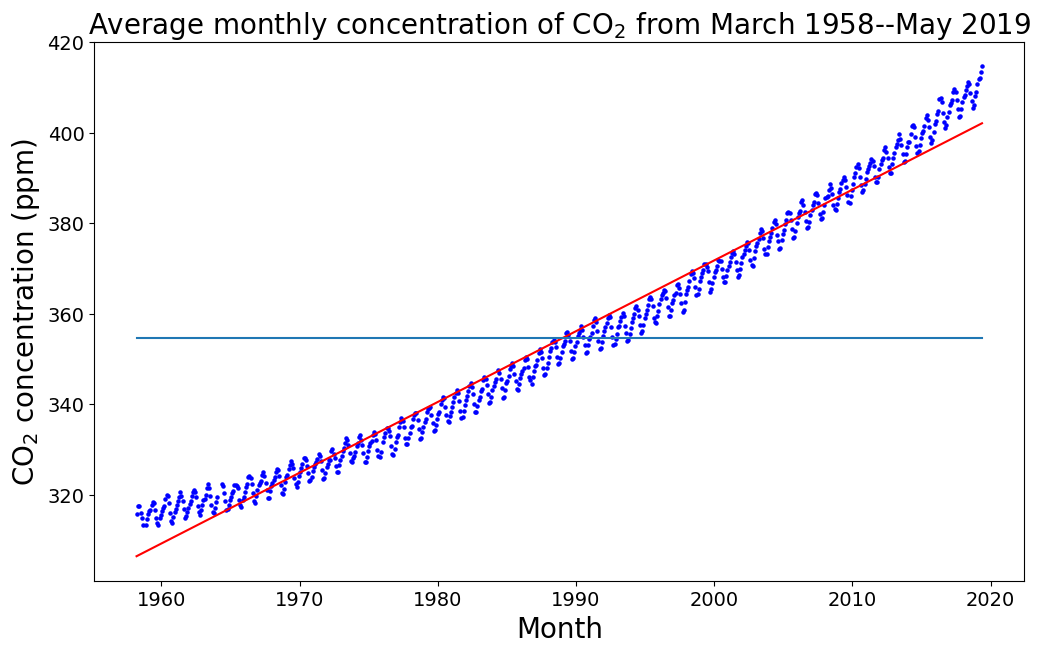

SSE_0 =  565456.53  	 MSE_0 =  776.73
SSE_1 =  12841.8  	 MSE_1 =  17.64


In [11]:
# Computing the fit of the model
fit_lin = X.dot(beta_lin)   

# Fit of zeroth-order model (mean of y)
fit_0 = np.mean(yvalues)*all_ones 

plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(dates, CO2_levels, s=5, color ='blue')   # s can be used to adjust the size of the dots
plt.plot(dates, fit_lin, color = 'red')
plt.plot(dates, fit_0)  
plt.xlabel('Month')
plt.ylabel('CO$_2$ concentration (ppm)')
plt.title('Average monthly concentration of CO$_2$ from March 1958--May 2019')
plt.savefig('CO2_linear_fit.pdf', bbox_inches = 'tight')
plt.show()

#We now compute the sum of squared errors and the MSE
SSE_0 = np.linalg.norm(yvalues - fit_0)**2
MSE_0 = SSE_0/(np.size(yvalues))

SSE_1 = np.linalg.norm(yvalues - fit_lin)**2
MSE_1 = SSE_1/(np.size(yvalues))

print('SSE_0 = ', np.round(SSE_0, 2), ' \t MSE_0 = ', np.round(MSE_0, 2))  
print('SSE_1 = ', np.round(SSE_1, 2), ' \t MSE_1 = ', np.round(MSE_1, 2) )

# Goodness of fit

We observe that SSE/MSE of the linear model is significantly lower than that of the zeroth order order model. In fact for any data set, we will have always have $SSE_1 \leq SSE_0$ (because the linear model subsumes the constant one). 

We would like a measure of how much the linear model improves over the zeroth order model. We could use  something like $(SSE_1 - SSE_0)$, but this is sensitive to the magnitude of values in the dataset. Therefore a commonly used measure to test the quality of a linear model is the 
_coefficient of determination_, defined as 

$$
R^2 = 1 - \frac{SSE_1}{SSE_0}
$$

Since $\frac{1}{N}SSE_0 = \frac{1}{N}\sum_{i=1}^N (y_i - \bar{y})^2$ is the variance of the observations  $\{ y_i \}_{i=1, \ldots,N}$, we can interpret $R^2$ as the proportion of the variance in the data explained by the linear model. ($SSE_1$ is the part of the variance not explained by the linear model.) The coefficient of determination is often referred to as just "R-squared".  Let us compute $R^2$ for the above regression.

In [12]:
print('R^2 for the first-order linear model = ', np.round(1- SSE_1/SSE_0, decimals = 4))

R^2 for the first-order linear model =  0.9773


### Some statistical  terminology

The procedure we have carried out is called _simple linear regression_ or sometimes, _least squares_ regression (because the coefficient vector $\boldsymbol{\beta}^*$ is chosen to minimise the sum of squared errors $\| \boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta} \|^2$. In the model $f(x) = \beta_0 + \beta_1 x$, the coefficients $\beta_0, \beta_1$ are called the regression coefficients.)

Recall that for each $(x_i, y_i)$, the quantity $(y_i - f(x_i))$ is called the _residual_ -- this is the difference  between the actual observation and the prediction of the model.  For the linear model fitted above,  the residuals   $(y_i \, - \, (\beta_0^*+\beta_1^* x_i))$, for $i=1, \ldots, n$, can be compactly written in vector form as $\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta}$.

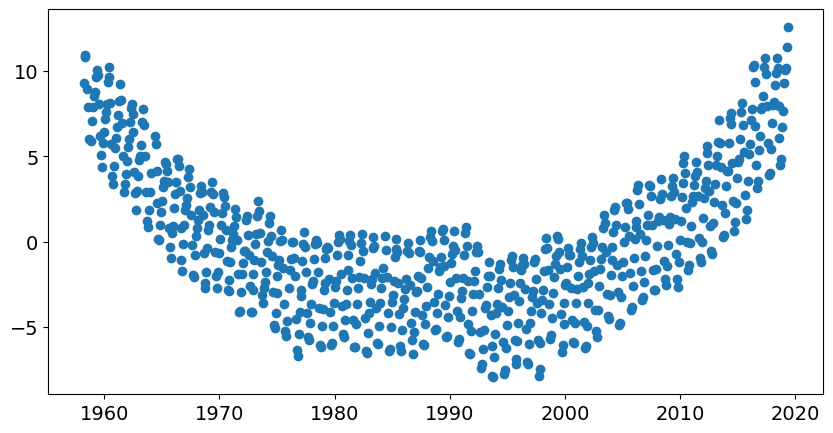

In [10]:
#Compute the residuals
resid_lin = yvalues - fit_lin

plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(dates, resid_lin)
plt.show()

Notice that the residuals appear to have a U-shaped long-term trend. You can also see this clearly from the fit  of the linear model, where the data departs from the fitted straight line -- it seems like fitting a quadratic model would capture the trend in the data better.  Before we do that, let us plot a histogram of the residuals and compare with a Gaussian distribution with zero mean and the same variance.

Mean of residuals =  -0.0 Variance of residuals =  17.64


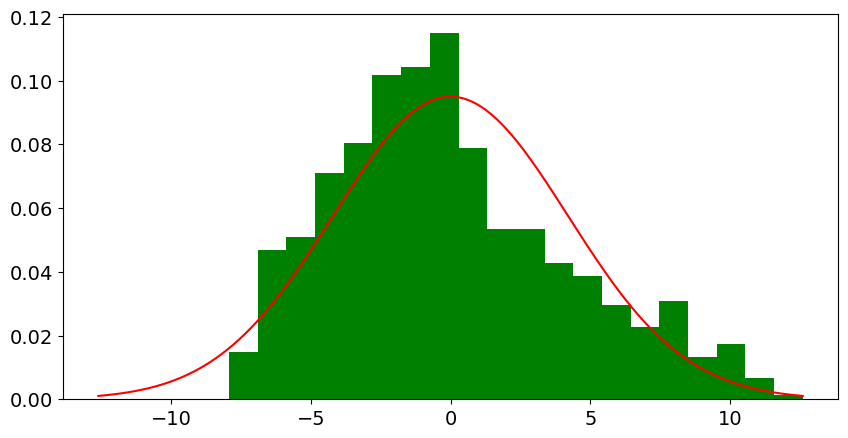

In [11]:
print('Mean of residuals = ', np.round(np.mean(resid_lin), 5), 'Variance of residuals = ', 
      np.round(np.var(resid_lin), 3))

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(resid_lin, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
from scipy.stats import norm

res_stdev = np.std(resid_lin)  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()

We observe that the mean of the residuals is very close to zero, but their distribution is not very close to Gaussian.  For linear regression where the fit includes the $\beta_0$ term, the mean of the residuals will always be close to zero -- because otherwise the SSE could be further decreased by adjusting the $\beta_0$ term to absorb the mean.

The histogram plot is overlayed with a Gaussian probability density function which has zero mean and variance 17.64. We see that the histogram of errors do not appear to be Gaussian -- the Gaussian assumption is often assumed in the theoretical analysis of regression to simplify the mathematical analysis. Other than the histogram not being Gaussian, it is also important to note that the error distribution is not symmetric around 0. This asymmetry indicates the model can still be improved


As observed earlier, the scatter plot of the residuals has a U-shaped long-term trend.  This raises the question: how much can we improve the MSE by fitting a more complicated model, like the quadratic model $\beta_0 + \beta_1 x + \beta_2 x^2$? 

# General model for linear regression

Let us now consider a general model of the form 

\begin{equation} 
f(x) = \beta_0 + \beta_1 g_1(x) + \dots + \beta_k g_k(x)
\end{equation}

where $g_1, \ldots, g_k$ are some pre-specified functions. Let us look at some examples:
1. For the first-order linear model, $k=1$ and $g_1(x)=x$. 
2. For a quadratic model, $f(x) = \beta_0 + \beta_1 x  + \beta_2 x^2$. Here $k=2$, $g_1(x)=x$, and  $g_2(x) =x^2$.
3. For a linear + sinusoidal model with $f(x) = \beta_0 + \beta_1 x + \beta_2 \sin(x) + \beta_3 \cos(x)$.

### Fitting the general model using least squares

We will now see that the optimal values of the regression coefficients $\beta_0, \ldots, \beta_k$ can be determined using least-squares, similarly to the first-order linear model. Given data $\{(x_i, y_i)\}_{i=1, \ldots, n}$ The sum of squared errors for the general model is 


 \begin{align}
SSE = \sum_{i=1}^n \left( y_i - \big( \beta_0 + \beta_1 g_1(x_i) + \dots + \beta_k g_k(x_i) \big) \right)^2
\end{align}

Redefine the matrix $\boldsymbol{X}$ and the coefficient vector $\boldsymbol{\beta}$ as
\begin{align}
\boldsymbol{X} = 
\begin{bmatrix}
1 & g_1(x_1) & \dots & g_k(x_1) \\
1 & g_1(x_2) & \dots & g_k(x_2) \\
\vdots & \vdots & & \vdots \\
1 & g_1(x_N) & \dots & g_k(x_N)
\end{bmatrix}, 
\qquad
\boldsymbol{\beta} = 
\begin{bmatrix}
\beta_0 \\ 
\beta_1 \\ 
\vdots \\ 
\beta_k
\end{bmatrix}
\end{align}

Note that the matrix $\boldsymbol{X}$ has dimensions $N \times (k+1)$. With these definitions, the $SSE$ above can be written as 

$$
SSE = \| \boldsymbol{y} - \boldsymbol{X}\boldsymbol{\beta}  \|^2.
$$

This is exactly the same SSE expression as the first-order model, but with $\boldsymbol{X}$ and $\boldsymbol{\beta}$ redefined as above. The derivation of the optimal $\boldsymbol{\beta}^*$ still holds, and therefore the optimum coefficient vector is:
\begin{equation}
\boldsymbol{\beta}^* \, = \,  (\boldsymbol{X}^{\sf{T}} \boldsymbol{X})^{-1} \boldsymbol{X}^{\sf{T}} \boldsymbol{y}.
\end{equation}

With this coefficient vector the  model is $f(x) = \beta^*_0 \, + \, \beta^*_1 g_1(x) \, + \ldots + \, \beta^*_k g_k(x)$, where $\beta^*_0, \beta^*_1, \ldots, \beta^*_k$  are the components of $\boldsymbol{\beta}^*$. The fit of the  model is $\boldsymbol{X} \boldsymbol{\beta}^*$, and the sum of squared errors  is
\begin{align}
SSE_k = \| \boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta}^* \|^2 
= \sum_{i=1}^n \left( y_i - \big( \beta_0^* + \beta_1^* g_1(x_i) + \dots + \beta_k^* g_k(x_i) \big) \right)^2
\end{align}



#### Remarks: 

1. Though the functions $g_1(x), \ldots, g_k(x)$ can be arbitrary, the procedure above is still called linear regression. This is because we can view the model as having $k$ input variables --  $g_1(x), \ldots, g_k(x)$, and the model's prediction as a linear combination of these variables, with $\beta_0, \ldots, \beta_k$ being the coefficients of the linear combination. 


2.  The above procedure naturally extends to linear models where $y$ is a linear combination of _multiple_ input variables. For example, if we have data points of the form $\{ (x_i, v_i,  y_i) \}_{i=1, \ldots, N}$,  we can  fit a linear model of the form $y = f(x, v) = \beta_0 + \beta_1 x + \beta_2 v$. The optimal coefficients $(\beta_0^*, \beta_1^*, \beta_2^*)$ can be found using the same least-squares formula above, with $\boldsymbol{X}$ now being defined as

$$
\boldsymbol{X}= \begin{bmatrix}
1 &  x_1 & v_1 \\ 1 & x_2  & v_2\\ \vdots & \vdots &   \vdots \\ 1 & x_N   & v_N 
\end{bmatrix}.
$$

## Fitting a quadratic model  to the $CO_2$ data

The quadratic model has the form $f(x) = \beta_0 + \beta_1 x + \beta_2 x^2$. Let us compute the optimal regression coefficients. We need to assemble the matrix $\boldsymbol{X}$ whose $ith$ row is the vector $[1 \ x_i \ x_i^2]$, and then compute $\boldsymbol{\beta}^*$ using the formula given above.

In [13]:
# fitting a quadratic model

# Create a matrix X2 with the first column all ones, second column containing dates, and the third col. 
# containing square of dates
X2 = np.column_stack((all_ones, dates, dates**2))
print('The dimensions of X2 are',np.shape(X2))

yvalues = CO2_levels 

# Computing the coefficient vector beta* using least squares formula
beta_quad = np.linalg.lstsq(X2, yvalues, rcond=None)[0]    

#you can also compute beta* explicitly using the pseudoinverse formula 
 
print('The dimensions of beta are',np.shape(beta_quad))
print('Regression coefficients for quadratic model: beta_0 = ', np.round(beta_quad[0], 3), 
      '\t beta_1 =', np.round(beta_quad[1], 3), '\t beta_2 =', np.round(beta_quad[2], 3))
print('Regression coefficients for linear model: beta_0 =', np.round(beta_lin[0], decimals =3), 
      '\t beta_1 = ', np.round(beta_lin[1], decimals =3)) 


The dimensions of X2 are (728, 3)
The dimensions of beta are (3,)
Regression coefficients for quadratic model: beta_0 =  47931.759 	 beta_1 = -49.411 	 beta_2 = 0.013
Regression coefficients for linear model: beta_0 = -2756.134 	 beta_1 =  1.564


Let us plot the fit of the quadratic model alongside the linear one, and compare their MSE.

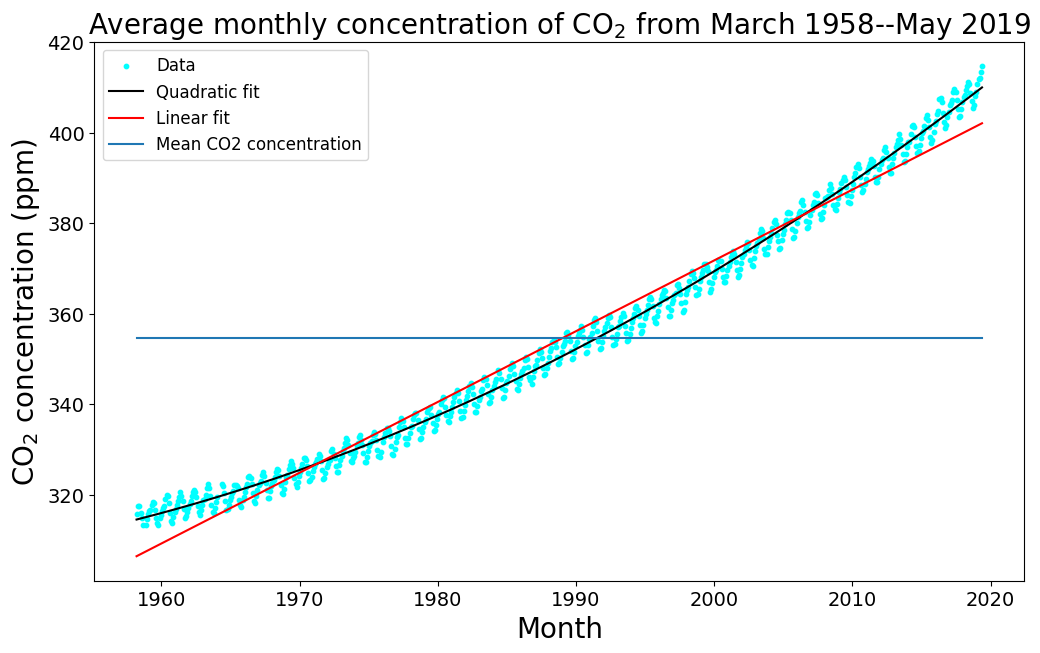

SSE_0 =  565456.53  	 MSE_0 =  776.73
SSE_1 =  12841.8  	 MSE_1 =  17.64
SSE_2 =  3584.06  	 MSE_2 =  4.92
R^2 for the quadratic model =  0.9937


In [15]:
fit_quad = X2.dot(beta_quad)   # Computing the fit of the quadratic model

plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(dates, CO2_levels, s=10, color = 'cyan', label = 'Data')   
plt.plot(dates, fit_quad, color = 'black', label = 'Quadratic fit')
plt.plot(dates, fit_lin, color = 'red', label = 'Linear fit')
plt.plot(dates, fit_0, label = 'Mean CO2 concentration')  
plt.xlabel('Month')
plt.ylabel('CO$_2$ concentration (ppm)')
plt.title('Average monthly concentration of CO$_2$ from March 1958--May 2019')
plt.legend(fontsize = 'large')
plt.savefig('CO2_lin_quad_fit.pdf', bbox_inches = 'tight')
plt.show()


#We now compute the sum of squared errors
SSE_2 = np.linalg.norm(yvalues - fit_quad)**2
MSE_2 = SSE_2/(np.size(yvalues))
print('SSE_0 = ', np.round(SSE_0, 2), ' \t MSE_0 = ', np.round(MSE_0, 2))  
print('SSE_1 = ', np.round(SSE_1, 2), ' \t MSE_1 = ', np.round(MSE_1, 2))
print('SSE_2 = ', np.round(SSE_2, 2), ' \t MSE_2 = ', np.round(MSE_2, 2))
print('R^2 for the quadratic model = ', np.round(1- SSE_2/SSE_0, decimals = 4))

## Residuals of the quadratic model

We immediately note that the quadratic model does follow the trend in the data more closely (smaller SSE/MSE). Let us check  whether this corrects the asymmetry in the histogram of the residuals.

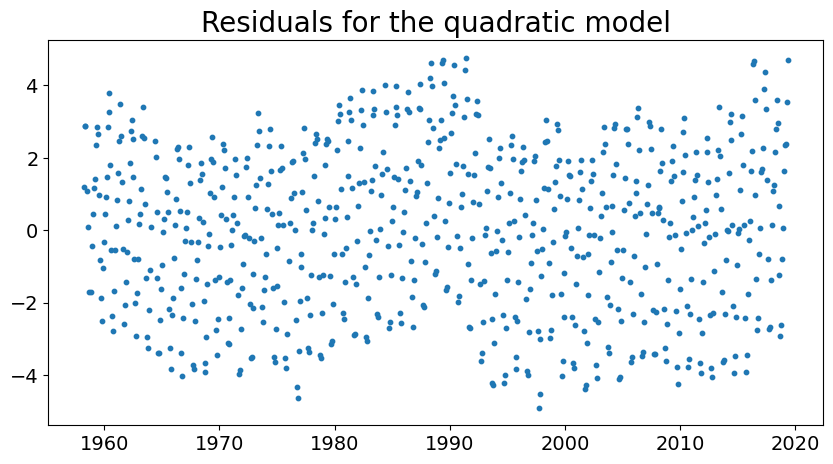

Mean of residuals for quadratic model =  0.0 Variance of residuals =  4.923


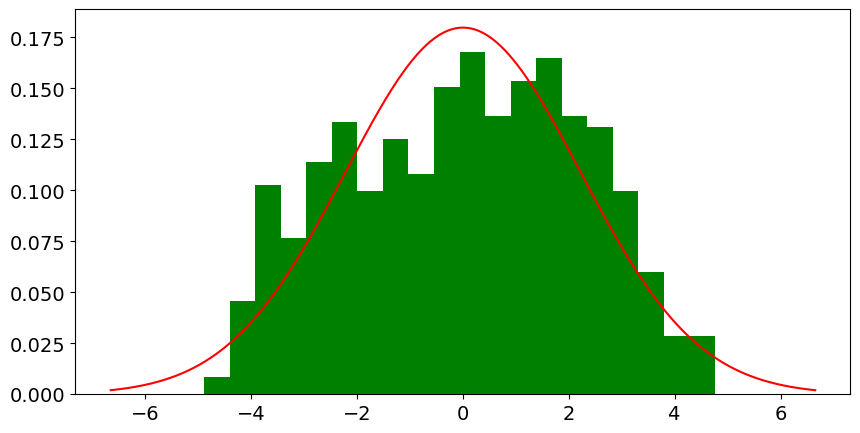

In [14]:
# Computing the residuals
resid_quad = yvalues - fit_quad

plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(dates, resid_quad, s=10)
plt.title('Residuals for the quadratic model')
plt.savefig('quad_resid.png', bbox_inches = 'tight')
plt.show()

print('Mean of residuals for quadratic model = ', np.round(np.mean(resid_quad), 3), 
      'Variance of residuals = ', np.round(np.var(resid_quad),3)) 

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(resid_quad, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
res_quad_stdev = np.std(resid_quad)  #standard deviation of residuals
xvals = np.linspace(-3*res_quad_stdev,3*res_quad_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_quad_stdev), 'r')
plt.show()

Although the histogram of the residuals is not Gaussian (compare with overlaid Gaussian probability density function with matching mean and variance), it does appear more symmetric.

Let us zoom in on the scatterplot of the residuals and examine the residual over a short period of time (around 4 years)

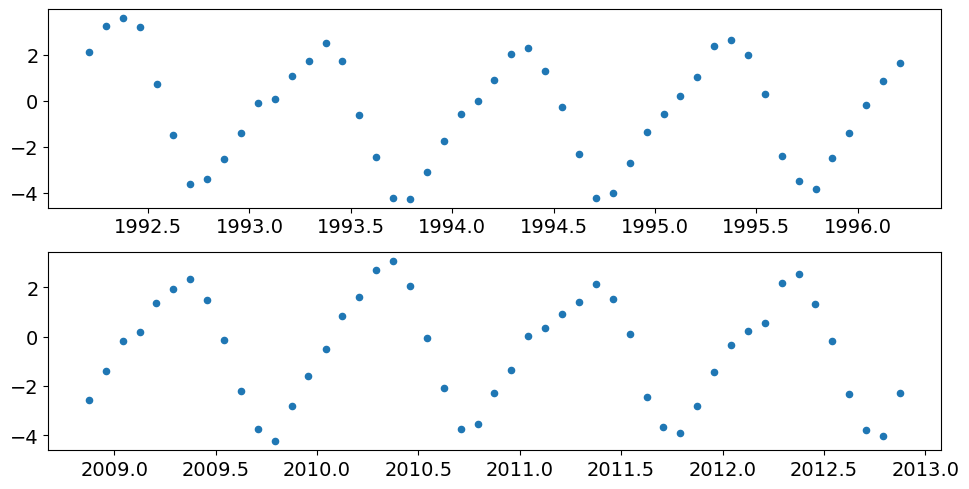

In [15]:
plt.subplot(211)
plt.scatter(dates[401:450], resid_quad[401:450], s=20) 
plt.subplot(212)
plt.scatter(dates[601:650], resid_quad[601:650], s=20)
plt.savefig('zoom_qresid.png', bbox_inches='tight')
plt.tight_layout()

We observe that the residuals have a short-term periodic trend (of period approximately one year), but no apparent long-term trend. In the next notebook, we will capture the periodic components by adding a sinusoidal component to the model. The frequencies of the sinusoids in the model will be determined using a Fourier transform of these residuals.

# Summary

A time series consists of data $(x_1, y_1), \ldots, (x_N, y_N)$, where the $x_i$'s are equally-spaced instants of time, and $y_i$ is the observation at time $x_i$. We can model the time series as the sum of a long-term trend, a seasonal (periodic) component, and additive noise. 

In this notebook, we fit a linear and a quadratic model to capture the long-term trend, and compared their performance using the MSE and by observing the resulting histogram of residuals. 

1. Linear, quadratic, or more general models can all be fit using the method of "least squares", sometimes called OLS ("ordinary least squares"). The model determines the matrix $\boldsymbol{X}$, whose columns correspond to the explanatory variables or "features".

2. Examining the residuals--the part of the data that is _not_ fit by the model--reveals whether there is underlying structure that can be modelling by adding additional components to the model.

# References:

1. _Introduction to Statistical Learning_ , by G. James, D. Witten, T. Hastie, R. Tibshirani. A free downloadable copy of the book is available [here](http://faculty.marshall.usc.edu/gareth-james/ISL/).  Chapter 3 discusses linear regression with several real-world examples.
1. _Elements of Statistical Learning_ , by T. Hastie, R. Tibshirani, J. Friedman. Free downloadable copy available [here](https://web.stanford.edu/~hastie/ElemStatLearn/). This book covers similar topics as the above but with more mathematical detail and rigour. Chapter 3.1 and 3.2 discuss linear regression.
1.  _Time Series Analysis and its Applications_ , by R. H. Shumway and D. S. Stoffer, 4th edition, 2017. Free downloadable copy available [here](https://www.stat.pitt.edu/stoffer/tsa4/).  (Chapter 1 gives an intro to time series analysis, and Chapter 2.1 discusses the use of linear regression to fit a trend.)

## You should now do Exercise notebooks 1 and 2 [here](Exercises/).